# Practice Project 5: Titanic Project

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [183]:
pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv('titanic.csv')

print(dataset.shape)
    
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis

Handling Missing Values

<AxesSubplot:>

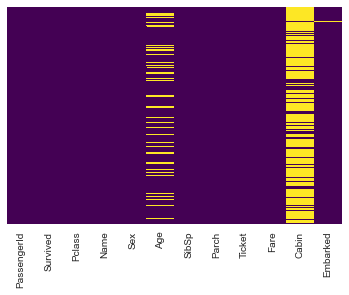

In [184]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#after looking at the above graph, I think that Age is more important feature than Cabin, so I will handle the missing values in Age and drop Cabin from the dataset.
#Considering 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

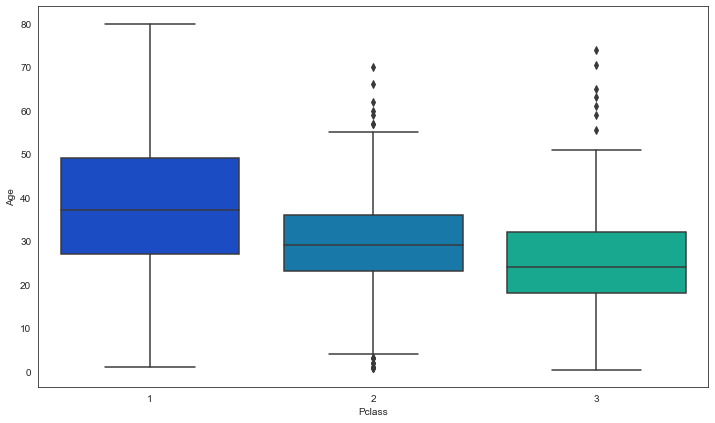

In [192]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [197]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
    
        elif Pclass==2:
            return 29

        else:
            return 24
    
    else:
        return Age

In [198]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

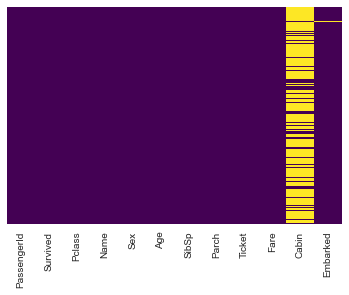

In [199]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [200]:
#now, there are no missing values in age.
#will visualize at the rest of the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

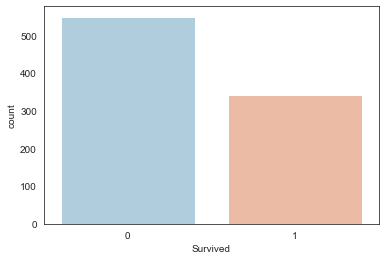

In [201]:
sns.set_style('white')
sns.countplot(x='Survived', data=dataset, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

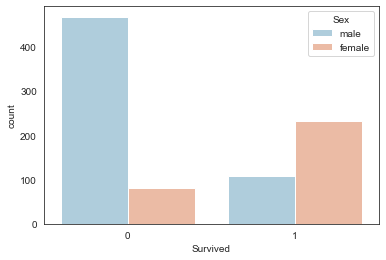

In [202]:
sns.set_style('white')
sns.countplot(x='Survived', hue='Sex', data=dataset, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

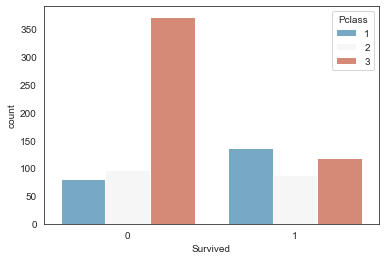

In [203]:
sns.set_style('white')
sns.countplot(x='Survived', hue='Pclass',data=dataset, palette='RdBu_r')

<AxesSubplot:xlabel='Age'>

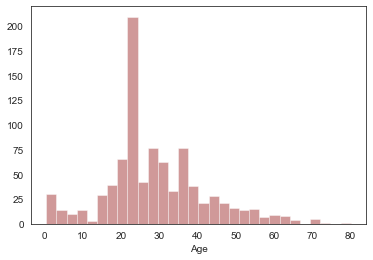

In [205]:
sns.distplot(dataset['Age'],kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Fare'>

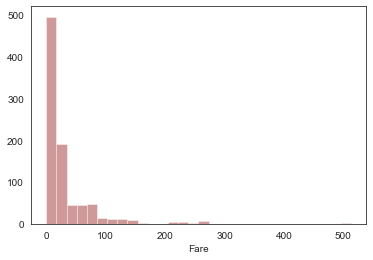

In [206]:
sns.distplot(dataset['Fare'],kde=False,color='darkred',bins=30)

In [207]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
num_fea=[feature for feature in dataset.columns if dataset[feature].dtypes !='O']

print('No. of Numerical Variables:',len(num_fea))

dataset[num_fea].head()

No. of Numerical Variables: 7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [20]:
#Scatterplot for this data was not useful!

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

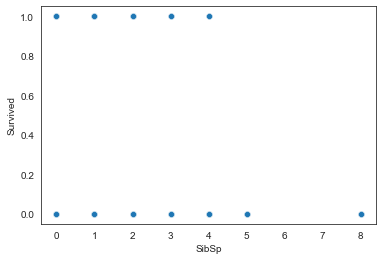

In [209]:
sns.scatterplot(x='SibSp',y='Survived',data=dataset)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

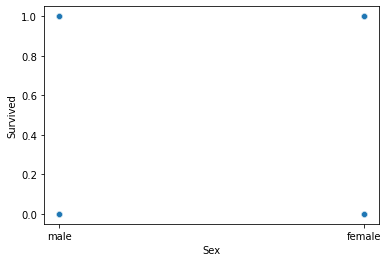

In [22]:
sns.scatterplot(x='Sex',y='Survived',data=dataset)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

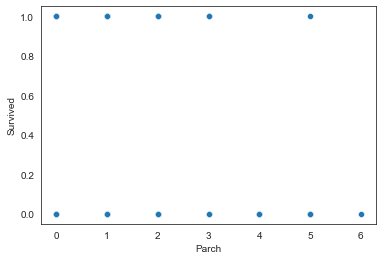

In [210]:
sns.scatterplot(x='Parch',y='Survived',data=dataset)

In [24]:
#moving on to correlation to understand the relationship between the survival numbers and other variables

In [211]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


In [212]:
dataset.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.047255
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [23]:
#The positive relationships with Survived are: Parch and Fare. So, The more passengers with family and children survived more and those who spent more for their fare, tend to have survived more. Clearly, Fare has the highest positive correlation!

In [26]:
#for the negative correlations: Pclass plays a big role. Then age and finally siblings/spouse on board

In [ ]:
#It is important to note that we are missing categorical features in correlation. This needs to be worked in the latter portion of the analysis.

In [25]:
#creating a heatmap to visualize these relationships

<AxesSubplot:>

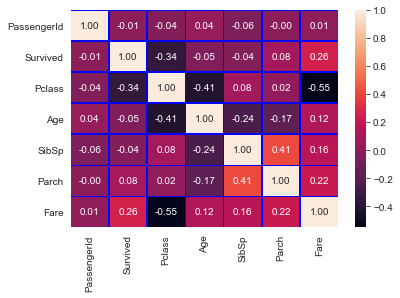

In [213]:
sns.heatmap(dataset.corr(),annot=True, linewidth=0.5, linecolor='blue', fmt='.2f')

In [ ]:
#Now, I am going to do dummy encoding to convert categorical features into numerical features. Then I will drop unnecessary columns and finally look at correlations between all the new features and the Survived column.

In [214]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [215]:
ds1=pd.get_dummies(dataset['Embarked'])

In [216]:
ds1

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [217]:
data=pd.concat([ds1,dataset],axis=1)

In [218]:
data

,C,Q,S,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,0,0,1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,0,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,0,0,1,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,0,1,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,0,0,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [219]:
data1=data.drop(labels='Ticket',axis=1)

In [220]:
data2=data1.drop(labels='Cabin',axis=1)

In [221]:
data2

,C,Q,S,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,0,0,1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,0,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,0,0,1,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,0,1,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.4500,S
889,1,0,0,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [222]:
data3=data2.drop(labels='Name',axis=1)

In [223]:
data3

,C,Q,S,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,1,0,3,male,22.0,1,0,7.2500,S
1,1,0,0,2,1,1,female,38.0,1,0,71.2833,C
2,0,0,1,3,1,3,female,26.0,0,0,7.9250,S
3,0,0,1,4,1,1,female,35.0,1,0,53.1000,S
4,0,0,1,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,887,0,2,male,27.0,0,0,13.0000,S
887,0,0,1,888,1,1,female,19.0,0,0,30.0000,S
888,0,0,1,889,0,3,female,24.0,1,2,23.4500,S
889,1,0,0,890,1,1,male,26.0,0,0,30.0000,C


In [224]:
ds2=pd.get_dummies(dataset['Sex'])

In [225]:
ds2

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [226]:
data_set=pd.concat([ds2,data3],axis=1)

In [227]:
data_set

,female,male,C,Q,S,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,0,1,1,0,3,male,22.0,1,0,7.2500,S
1,1,0,1,0,0,2,1,1,female,38.0,1,0,71.2833,C
2,1,0,0,0,1,3,1,3,female,26.0,0,0,7.9250,S
3,1,0,0,0,1,4,1,1,female,35.0,1,0,53.1000,S
4,0,1,0,0,1,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,887,0,2,male,27.0,0,0,13.0000,S
887,1,0,0,0,1,888,1,1,female,19.0,0,0,30.0000,S
888,1,0,0,0,1,889,0,3,female,24.0,1,2,23.4500,S
889,0,1,1,0,0,890,1,1,male,26.0,0,0,30.0000,C


In [228]:
data4=data_set.drop(labels='Embarked',axis=1)

In [229]:
data5=data4.drop(labels='Sex',axis=1)

In [230]:
data6=data5.drop(labels='PassengerId',axis=1)

In [231]:
data6

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,2,27.0,0,0,13.0000
887,1,0,0,0,1,1,1,19.0,0,0,30.0000
888,1,0,0,0,1,0,3,24.0,1,2,23.4500
889,0,1,1,0,0,1,1,26.0,0,0,30.0000


In [120]:
data6.corr()['Survived']

female      0.543351
male       -0.543351
C           0.168240
Q           0.003650
S          -0.155660
Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [122]:
#This information can be helpful: positive correlation between female and survived which shows females survived as much as male didn't.
#we can see a ranking going on in the different Embarkments: C,Q,S, in which, people who embarked from C survived more than Q and Q more than S
#there is a negative relationship between Pclass and survived, showing that people from first class have survived more, then second class, then third. This is because python will use higher numbers as ranks, so we can easily understand the real idea if we flip the classes! That shows that first class people and second class people were considered to be saved before.
#negative relationship betwee age and survived shows that younger people were encouraged to be survived
#comparing SibSp and Parch it caan be understood that parents and children were mostly prioritized compared to siblings/spouses
#positive relationship between fare and survived adds to the class construct meaning that whoever paid more for the tickets and received first class or second class tickets were more prioritized to be saved.

In [232]:
data6.corr()

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
female,1.000000,-1.000000,0.082853,0.074115,-0.125722,0.543351,-0.131900,-0.078421,0.114631,0.245489,0.182333
male,-1.000000,1.000000,-0.082853,-0.074115,0.125722,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333
C,0.082853,-0.082853,1.000000,-0.148258,-0.778359,0.168240,-0.243292,0.040700,-0.059528,-0.011069,0.269335
Q,0.074115,-0.074115,-0.148258,1.000000,-0.496624,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216
S,-0.125722,0.125722,-0.778359,-0.496624,1.000000,-0.155660,0.081720,0.007763,0.070941,0.063036,-0.166603
Survived,0.543351,-0.543351,0.168240,0.003650,-0.155660,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.131900,0.131900,-0.243292,0.221009,0.081720,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,-0.078421,0.078421,0.040700,-0.081658,0.007763,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,0.114631,-0.114631,-0.059528,-0.026354,0.070941,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,0.245489,-0.245489,-0.011069,-0.081228,0.063036,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225


In [124]:
#from the above correlations we can see that Pclass and Fare has a negative relationship, meaning that. Price of tickets for higher class is higher, and since higher class is determined by 1, therefore the correlation is negative.

<AxesSubplot:>

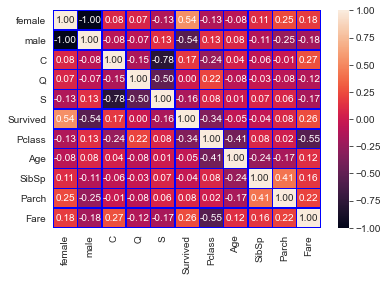

In [233]:
sns.heatmap(data6.corr(),annot=True, linewidth=0.5, linecolor='blue', fmt='.2f')

In [234]:
data6.skew()

female      0.618921
male       -0.618921
C           1.595149
Q           2.948778
S          -0.997083
Survived    0.478523
Pclass     -0.630548
Age         0.548256
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [237]:
data6.describe()

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.647587,0.188552,0.086420,0.722783,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,0.477990,0.477990,0.391372,0.281141,0.447876,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
pd.pandas.set_option('display.max_columns',None)
data6

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,2,27.0,0,0,13.0000
887,1,0,0,0,1,1,1,19.0,0,0,30.0000
888,1,0,0,0,1,0,3,24.0,1,2,23.4500
889,0,1,1,0,0,1,1,26.0,0,0,30.0000


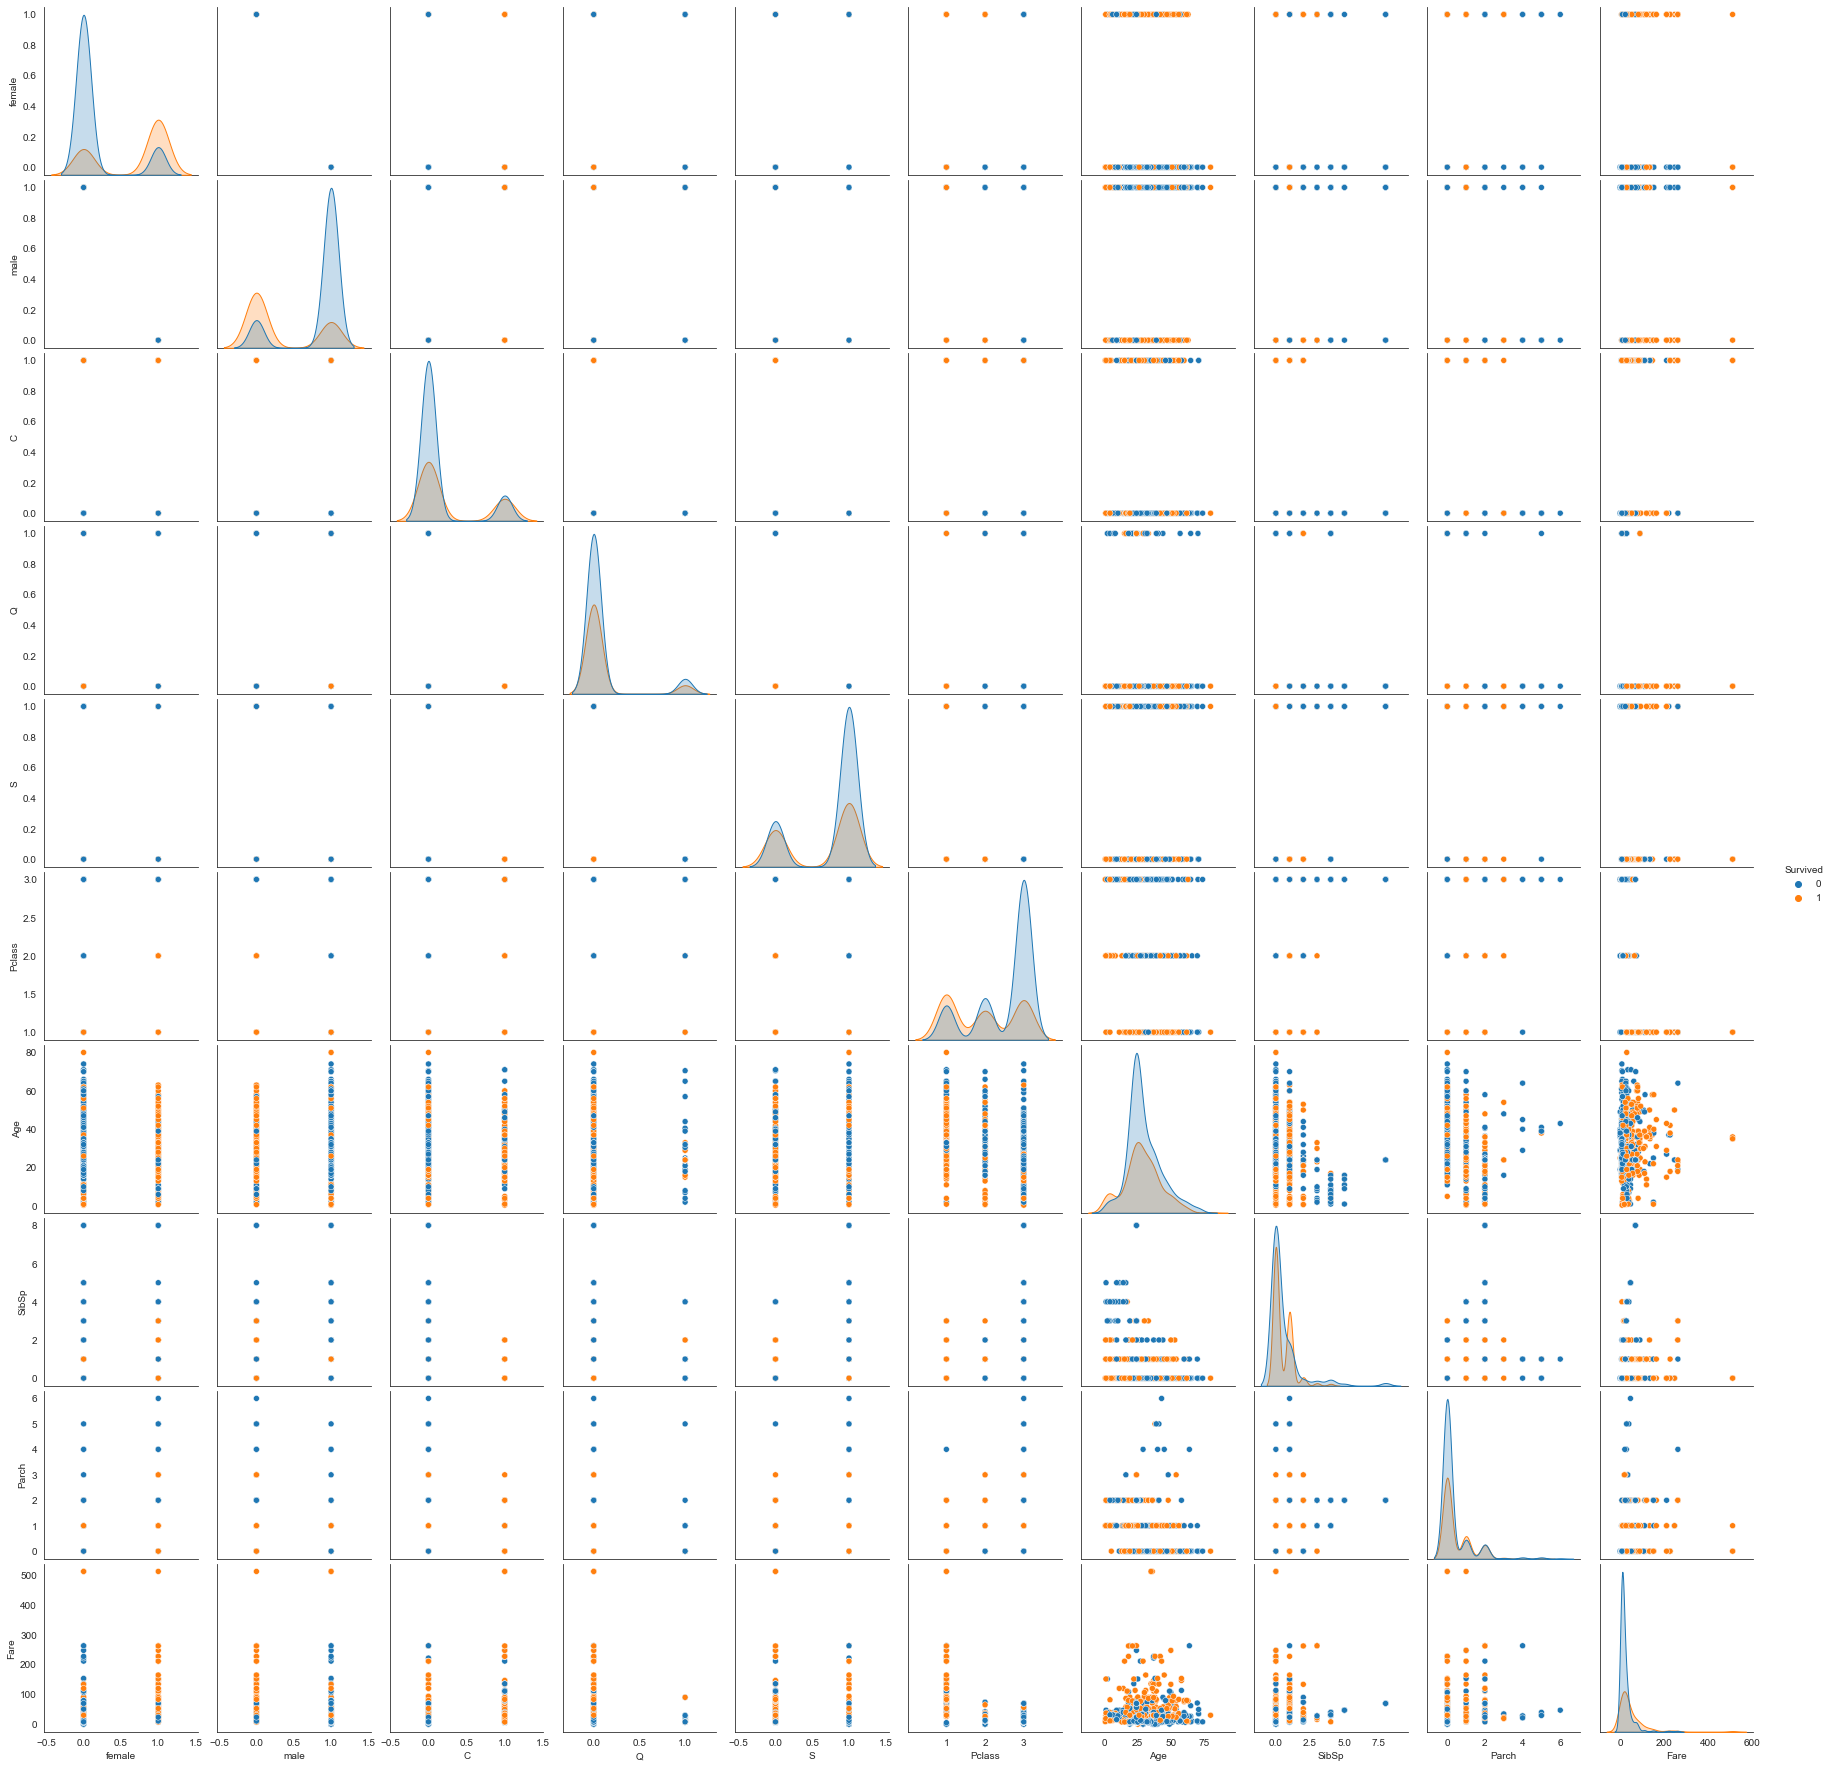

In [239]:
sns.pairplot(data6,hue='Survived')

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
scaler=StandardScaler()

In [242]:
scaler.fit(data6.drop('Survived',axis=1))

StandardScaler()

In [243]:
scaled_fea=scaler.transform(data6.drop('Survived',axis=1))

In [244]:
data6_fea=pd.DataFrame(scaled_fea,columns=data6.columns[:-1])

In [245]:
data6_fea
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
x_train,x_test,y_train,y_test=train_test_split(scaled_fea,data6['Survived'],test_size=0.30)

In [260]:
from sklearn.neighbors import KNeighborsClassifier

In [261]:
knn=KNeighborsClassifier(n_neighbors=1)

In [262]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [263]:
pred=knn.predict(x_test)

In [264]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [265]:
print(confusion_matrix(y_test,pred))

[[140  29]
 [ 27  72]]


In [266]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       169
           1       0.71      0.73      0.72        99

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [269]:
#choosing a k value

accuracy_rate=[]

for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,data6_fea,data6['Survived'],cv=10)
    accuracy_rate.append(score.mean())

In [270]:
error_rate=[]

for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,data6_fea,data6['Survived'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

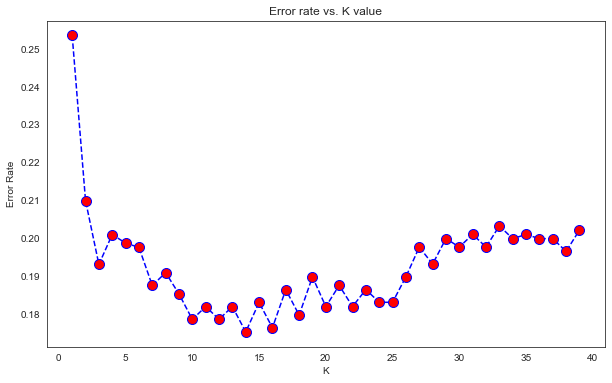

In [271]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)

plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [272]:
knn=KNeighborsClassifier(n_neighbors=14)

In [273]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [274]:
pred=knn.predict(x_test)

In [275]:
print(confusion_matrix(y_test,pred))

[[156  13]
 [ 30  69]]


In [276]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       169
           1       0.84      0.70      0.76        99

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268

